# Data Split

_imports_

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 5]

_Local paths_

In [26]:
features = r'C:\Users\דניאל\Google Drive\ADS project - evercomliant\Processed data\vectorized_content.npy'
labels = r'C:\Users\דניאל\Google Drive\ADS project - evercomliant\Processed data\tokenized_labels.npy'
categories_path = r'c:\Users\דניאל\Google Drive\active_learning_project\categories.txt'

_Load data_

In [27]:
X = np.load(features)
y = np.load(labels)

_Split data: 40% train, 10% test and 50% for active learn_

In [28]:
X_train_test, X_active_learn, y_train_test, y_active_learn = train_test_split(X, y, test_size=0.5, stratify=y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2, stratify=y_train_test)

_Split the 50% preserved to active learn into two pools of 40% each (means 10% overlap)_

In [30]:
X_pool_1, _, y_pool_1, _ = train_test_split(X_active_learn, y_active_learn, test_size=0.2, stratify=y_active_learn)

In [31]:
X_pool_2, _, y_pool_2, _ = train_test_split(X_active_learn, y_active_learn, test_size=0.2, stratify=y_active_learn)

_Category distribution of **all data**_

In [32]:
categories = pd.read_csv(categories_path, quotechar='\'', names=['label','category'])
categories = dict(zip(categories.label, categories.category))

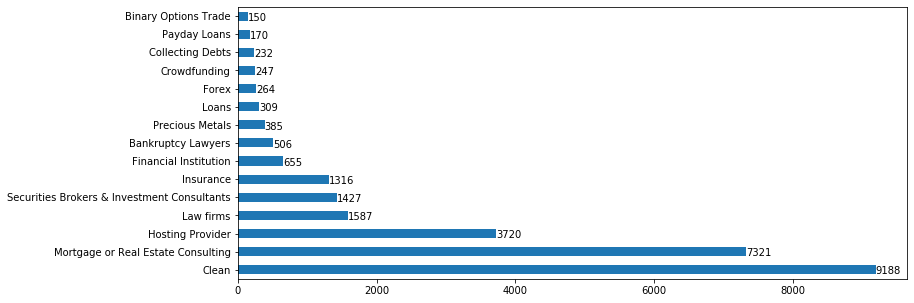

In [33]:
ax = pd.Series(y).apply(lambda label: categories[label]).value_counts().plot(kind='barh')
for p in ax.patches:
    w = p.get_bbox().bounds[2]
    h = p.get_bbox().bounds[1]
    ax.annotate(int(w), xy = (w, h))

_Category distribution of **train** set_

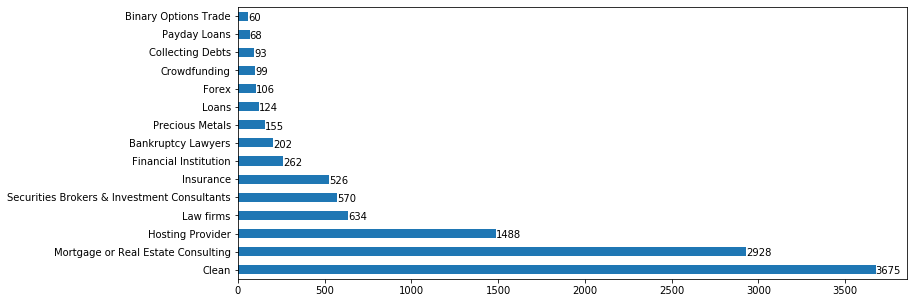

In [34]:
ax = pd.Series(y_train).apply(lambda label: categories[label]).value_counts().plot(kind='barh')
for p in ax.patches:
    w = p.get_bbox().bounds[2]
    h = p.get_bbox().bounds[1]
    ax.annotate(int(w), xy = (w, h))

_Category distribution of **test** set_

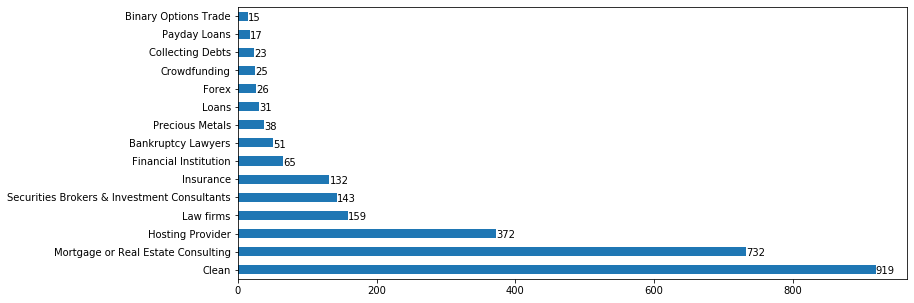

In [35]:
ax = pd.Series(y_test).apply(lambda label: categories[label]).value_counts().plot(kind='barh')
for p in ax.patches:
    w = p.get_bbox().bounds[2]
    h = p.get_bbox().bounds[1]
    ax.annotate(int(w), xy = (w, h))

_Category distribution of **one active learn pool**_

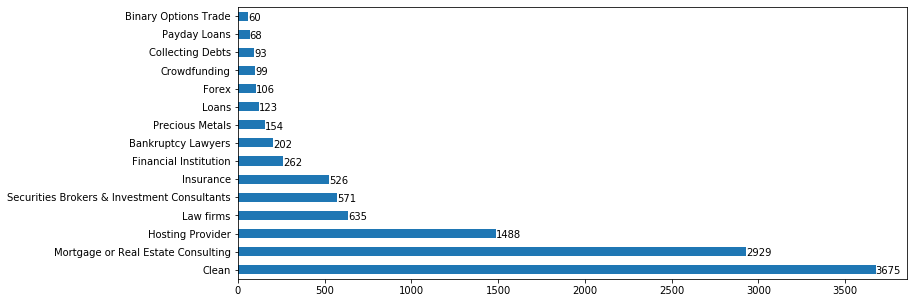

In [36]:
ax = pd.Series(y_pool_1).apply(lambda label: categories[label]).value_counts().plot(kind='barh')
for p in ax.patches:
    w = p.get_bbox().bounds[2]
    h = p.get_bbox().bounds[1]
    ax.annotate(int(w), xy = (w, h))

In [38]:
np.save(r'C:\Users\דניאל\Google Drive\ADS project - evercomliant\Partitioned data\X_train.npy', X_train)
np.save(r'C:\Users\דניאל\Google Drive\ADS project - evercomliant\Partitioned data\y_train.npy', y_train)
np.save(r'C:\Users\דניאל\Google Drive\ADS project - evercomliant\Partitioned data\X_test.npy', X_test)
np.save(r'C:\Users\דניאל\Google Drive\ADS project - evercomliant\Partitioned data\y_test.npy', y_test)
np.save(r'C:\Users\דניאל\Google Drive\ADS project - evercomliant\Partitioned data\X_pool_1.npy', X_pool_1)
np.save(r'C:\Users\דניאל\Google Drive\ADS project - evercomliant\Partitioned data\y_pool_1.npy', y_pool_1)
np.save(r'C:\Users\דניאל\Google Drive\ADS project - evercomliant\Partitioned data\X_pool_2.npy', X_pool_2)
np.save(r'C:\Users\דניאל\Google Drive\ADS project - evercomliant\Partitioned data\y_pool_2.npy', y_pool_2)